In [1]:
pip install requests pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd

In [3]:
api_url = "https://www.elprisenligenu.dk/api/v1/prices/2025/03-16_DK2.json"
response = requests.get(api_url)

if response.status_code == 200:
    print("data successfully recieved!")
    data = response.json()
else:
    print(f"receiving data has error: {response.status_code}")
    data = none

print(f"final data: {data}")

data successfully recieved!
final data: [{'DKK_per_kWh': 0.67397, 'EUR_per_kWh': 0.08997, 'EXR': 7.491017, 'time_start': '2025-03-16T00:00:00+01:00', 'time_end': '2025-03-16T01:00:00+01:00'}, {'DKK_per_kWh': 0.64235, 'EUR_per_kWh': 0.08575, 'EXR': 7.491017, 'time_start': '2025-03-16T01:00:00+01:00', 'time_end': '2025-03-16T02:00:00+01:00'}, {'DKK_per_kWh': 0.59606, 'EUR_per_kWh': 0.07957, 'EXR': 7.491017, 'time_start': '2025-03-16T02:00:00+01:00', 'time_end': '2025-03-16T03:00:00+01:00'}, {'DKK_per_kWh': 0.58542, 'EUR_per_kWh': 0.07815, 'EXR': 7.491017, 'time_start': '2025-03-16T03:00:00+01:00', 'time_end': '2025-03-16T04:00:00+01:00'}, {'DKK_per_kWh': 0.58842, 'EUR_per_kWh': 0.07855, 'EXR': 7.491017, 'time_start': '2025-03-16T04:00:00+01:00', 'time_end': '2025-03-16T05:00:00+01:00'}, {'DKK_per_kWh': 0.22031, 'EUR_per_kWh': 0.02941, 'EXR': 7.491017, 'time_start': '2025-03-16T05:00:00+01:00', 'time_end': '2025-03-16T06:00:00+01:00'}, {'DKK_per_kWh': 0.22578, 'EUR_per_kWh': 0.03014, 'EXR

In [4]:
if data:
    df = pd.DataFrame(data)
    print(df.head())
else:
    print("error")

   DKK_per_kWh  EUR_per_kWh       EXR                 time_start  \
0      0.67397      0.08997  7.491017  2025-03-16T00:00:00+01:00   
1      0.64235      0.08575  7.491017  2025-03-16T01:00:00+01:00   
2      0.59606      0.07957  7.491017  2025-03-16T02:00:00+01:00   
3      0.58542      0.07815  7.491017  2025-03-16T03:00:00+01:00   
4      0.58842      0.07855  7.491017  2025-03-16T04:00:00+01:00   

                    time_end  
0  2025-03-16T01:00:00+01:00  
1  2025-03-16T02:00:00+01:00  
2  2025-03-16T03:00:00+01:00  
3  2025-03-16T04:00:00+01:00  
4  2025-03-16T05:00:00+01:00  


In [5]:
if not df.empty:
    df.to_csv('electricity_prices.csv', index=False)
    print("data successfully stored in csv file!")
else:
    print("error in storing data")

data successfully stored in csv file!


In [6]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
df_loaded = pd.read_csv("electricity_prices.csv")
print(df_loaded.head())

   DKK_per_kWh  EUR_per_kWh       EXR                 time_start  \
0      0.67397      0.08997  7.491017  2025-03-16T00:00:00+01:00   
1      0.64235      0.08575  7.491017  2025-03-16T01:00:00+01:00   
2      0.59606      0.07957  7.491017  2025-03-16T02:00:00+01:00   
3      0.58542      0.07815  7.491017  2025-03-16T03:00:00+01:00   
4      0.58842      0.07855  7.491017  2025-03-16T04:00:00+01:00   

                    time_end  
0  2025-03-16T01:00:00+01:00  
1  2025-03-16T02:00:00+01:00  
2  2025-03-16T03:00:00+01:00  
3  2025-03-16T04:00:00+01:00  
4  2025-03-16T05:00:00+01:00  


In [8]:
df_loaded['time_start'] = pd.to_datetime(df_loaded['time_start'])
df_loaded['hour'] = df_loaded['time_start'].dt.hour
print(df_loaded.head())

   DKK_per_kWh  EUR_per_kWh       EXR                time_start  \
0      0.67397      0.08997  7.491017 2025-03-16 00:00:00+01:00   
1      0.64235      0.08575  7.491017 2025-03-16 01:00:00+01:00   
2      0.59606      0.07957  7.491017 2025-03-16 02:00:00+01:00   
3      0.58542      0.07815  7.491017 2025-03-16 03:00:00+01:00   
4      0.58842      0.07855  7.491017 2025-03-16 04:00:00+01:00   

                    time_end  hour  
0  2025-03-16T01:00:00+01:00     0  
1  2025-03-16T02:00:00+01:00     1  
2  2025-03-16T03:00:00+01:00     2  
3  2025-03-16T04:00:00+01:00     3  
4  2025-03-16T05:00:00+01:00     4  


In [9]:
avg_price_per_hour = df_loaded.groupby('hour')['EUR_per_kWh'].mean()
print(avg_price_per_hour)

hour
0     0.08997
1     0.08575
2     0.07957
3     0.07815
4     0.07855
5     0.02941
6     0.03014
7     0.03070
8     0.03050
9     0.02873
10    0.02406
11    0.00290
12    0.00101
13    0.00019
14    0.00267
15    0.03081
16    0.05997
17    0.09468
18    0.08361
19    0.04554
20    0.03149
21    0.03110
22    0.03069
23    0.03044
Name: EUR_per_kWh, dtype: float64


In [10]:
min_price_per_hour = df_loaded.groupby('hour')['EUR_per_kWh'].min()
max_price_per_hour = df_loaded.groupby('hour')['EUR_per_kWh'].max()
print(min_price_per_hour, max_price_per_hour)

hour
0     0.08997
1     0.08575
2     0.07957
3     0.07815
4     0.07855
5     0.02941
6     0.03014
7     0.03070
8     0.03050
9     0.02873
10    0.02406
11    0.00290
12    0.00101
13    0.00019
14    0.00267
15    0.03081
16    0.05997
17    0.09468
18    0.08361
19    0.04554
20    0.03149
21    0.03110
22    0.03069
23    0.03044
Name: EUR_per_kWh, dtype: float64 hour
0     0.08997
1     0.08575
2     0.07957
3     0.07815
4     0.07855
5     0.02941
6     0.03014
7     0.03070
8     0.03050
9     0.02873
10    0.02406
11    0.00290
12    0.00101
13    0.00019
14    0.00267
15    0.03081
16    0.05997
17    0.09468
18    0.08361
19    0.04554
20    0.03149
21    0.03110
22    0.03069
23    0.03044
Name: EUR_per_kWh, dtype: float64


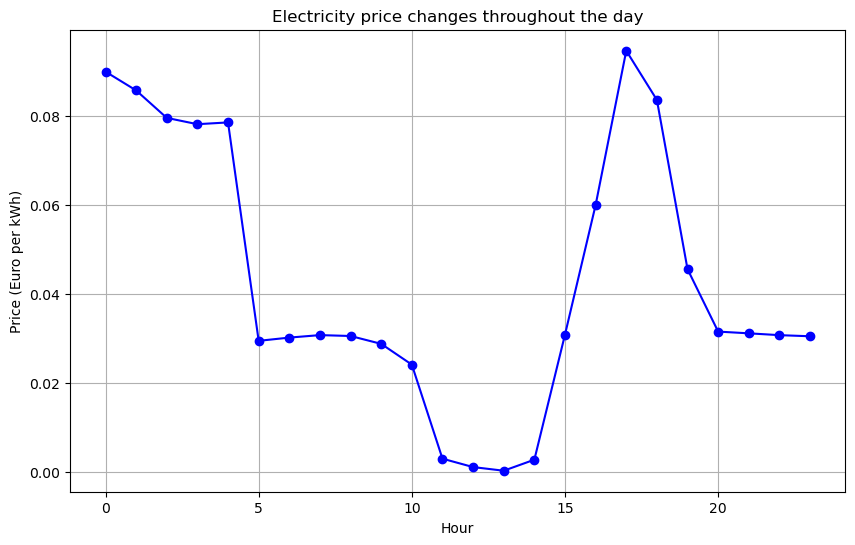

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_loaded['hour'], df_loaded['EUR_per_kWh'], marker='o', linestyle='-', color='b')
plt.title('Electricity price changes throughout the day')
plt.xlabel('Hour')
plt.ylabel('Price (Euro per kWh)')
plt.grid(True)
plt.show()

In [12]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def get_electricity_prices(date, area="DK2"):
    url = f"https://www.elprisenligenu.dk/api/v1/prices/{date}_{area}.json"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data for {date}")
        return None

In [13]:
def generate_dates_for_month(year, month):
    start_date = datetime(year, month, 1)
    next_month = start_date.replace(day=28) + timedelta(days=4)
    end_date = next_month - timedelta(days=next_month.day)
    date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]
    return date_range

In [14]:
def fetch_and_save_monthly_prices(year, month, area="DK2"):
    dates = generate_dates_for_month(year, month)
    all_prices = []

    for date in dates:
        date_str = date.strftime('%Y/%m-%d')
        prices = get_electricity_prices(date_str, area)
        if prices:
            for entry in prices:
                time_start = entry["time_start"]
                time_end = entry["time_end"]
                dkk_per_kwh = entry["DKK_per_kWh"]
                eur_per_kwh = entry["EUR_per_kWh"]
                exr = entry["EXR"]
                all_prices.append({
                    'date': date.strftime('%Y-%m-%d'),
                    'time_start': time_start,
                    'time_end': time_end,
                    'DKK_per_kWh': dkk_per_kwh,
                    'EUR_per_kWh': eur_per_kwh,
                    'EXR': exr
                })

    df = pd.DataFrame(all_prices)

    file_name = f"electricity_prices_{year}_{month:02d}_{area}.csv"
    df.to_csv(file_name, index=False)
    print(f"Data saved to {file_name}")

In [15]:
fetch_and_save_monthly_prices(2024, 12, area="DK2")

Data saved to electricity_prices_2024_12_DK2.csv


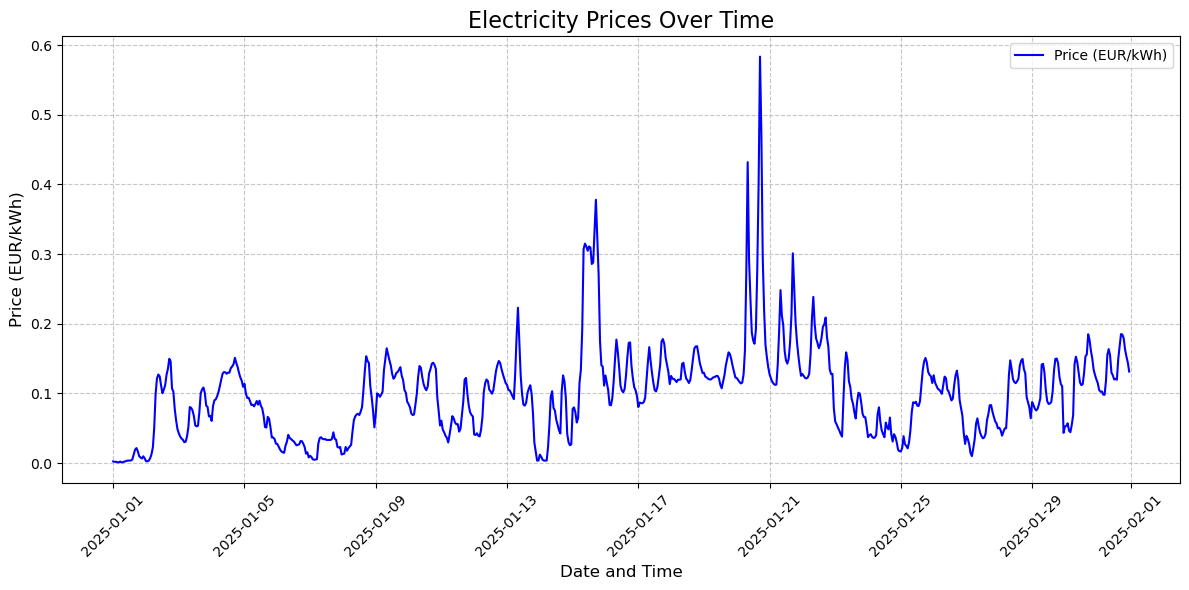

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_electricity_prices(csv_file):
    """
    این تابع داده‌های قیمت برق را از یک فایل CSV خوانده و نمودار می‌کشد.
    
    پارامترها:
    csv_file (str): مسیر فایل CSV حاوی داده‌های قیمت برق.
    """
    
    df = pd.read_csv(csv_file)
    
    df['date'] = pd.to_datetime(df['date'])
    
    df['datetime'] = df['date'].astype(str) + ' ' + df['time_start'].str.split('T').str[1]
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(df['datetime'], df['EUR_per_kWh'], label='Price (EUR/kWh)', color='blue')
    
    plt.title('Electricity Prices Over Time', fontsize=16)
    plt.xlabel('Date and Time', fontsize=12)
    plt.ylabel('Price (EUR/kWh)', fontsize=12)
    
    plt.xticks(rotation=45)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()

csv_file = "electricity_prices_2025_01_DK2.csv"
plot_electricity_prices(csv_file)

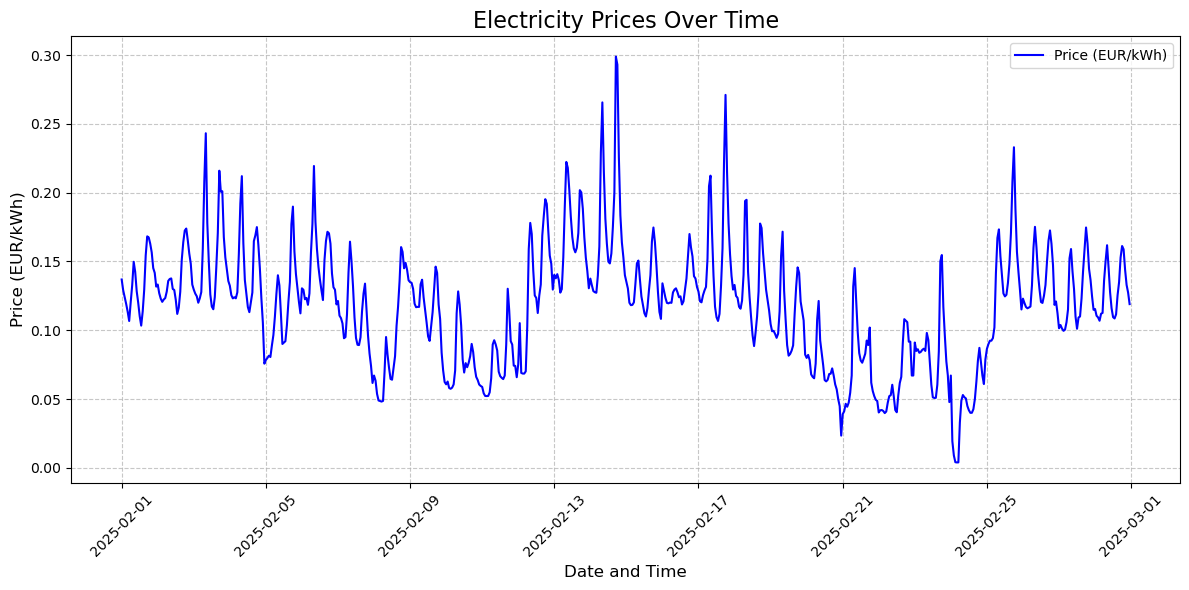

In [17]:
csv_file = "electricity_prices_2025_02_DK2.csv"
plot_electricity_prices(csv_file)

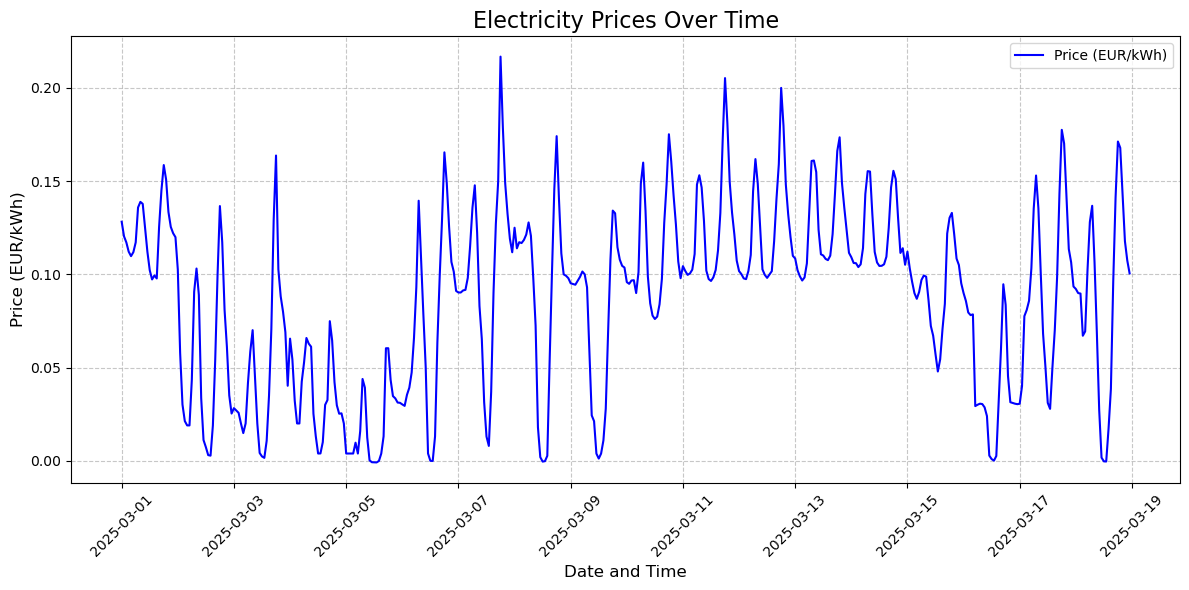

In [18]:
csv_file = "electricity_prices_2025_03_DK2.csv"
plot_electricity_prices(csv_file)

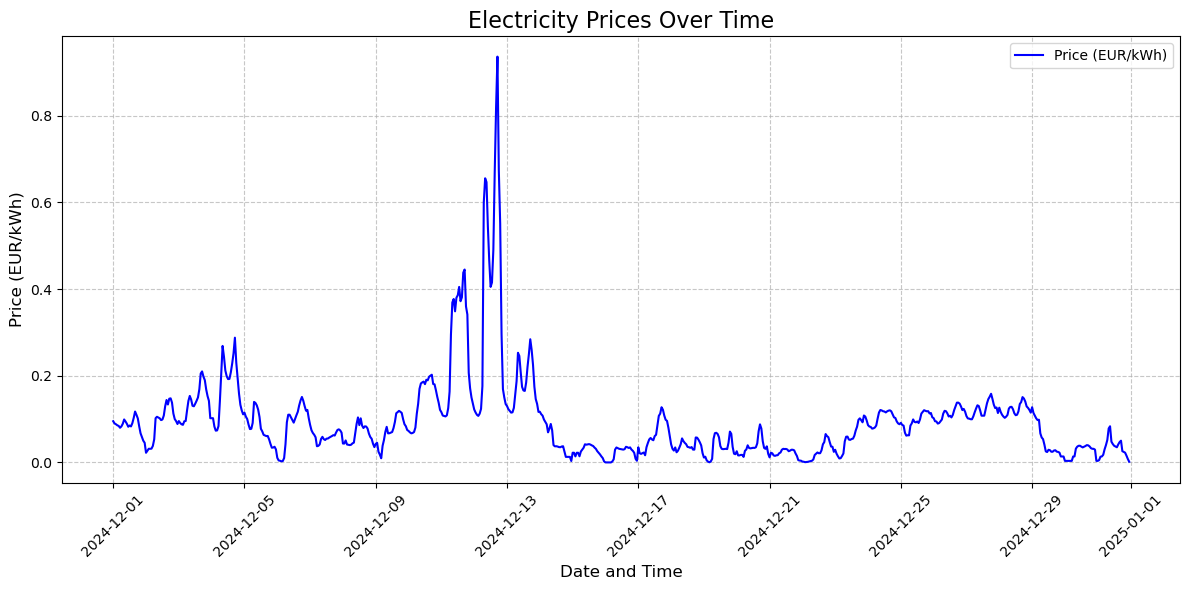

In [19]:
csv_file = "electricity_prices_2024_12_DK2.csv"
plot_electricity_prices(csv_file)

In [20]:
def calculate_daily_stats(csv_file):
    """
    این تابع داده‌های قیمت برق را از یک فایل CSV خوانده و میانگین، کمینه و بیشینه قیمت را برای هر روز محاسبه می‌کند.
    
    پارامترها:
    csv_file (str): مسیر فایل CSV حاوی داده‌های قیمت برق.
    """
    df = pd.read_csv(csv_file)
    df['date'] = pd.to_datetime(df['date'])
    daily_stats = df.groupby('date')['EUR_per_kWh'].agg(['mean', 'min', 'max'])

    print("Daily Statistics:")
    print(daily_stats)

    plt.figure(figsize=(12, 6))
    
    plt.plot(daily_stats.index, daily_stats['mean'], label='Mean Price', color='blue', marker='o')
    
    plt.plot(daily_stats.index, daily_stats['min'], label='Min Price', color='green', marker='x')
    
    plt.plot(daily_stats.index, daily_stats['max'], label='Max Price', color='red', marker='s')
    
    plt.title('Daily Electricity Price Statistics', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (EUR/kWh)', fontsize=12)
    
    plt.xticks(rotation=45)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Daily Statistics:
                mean      min      max
date                                  
2025-02-01  0.133698  0.10340  0.16827
2025-02-02  0.137127  0.11188  0.17395
2025-02-03  0.154506  0.11529  0.24323
2025-02-04  0.139171  0.07572  0.21204
2025-02-05  0.116190  0.07839  0.18990
2025-02-06  0.146571  0.11848  0.21942
2025-02-07  0.109022  0.06170  0.16441
2025-02-08  0.092886  0.04816  0.16049
2025-02-09  0.114593  0.06241  0.14625
2025-02-10  0.076819  0.05747  0.12826
2025-02-11  0.075447  0.05218  0.13019
2025-02-12  0.132217  0.06851  0.19532
2025-02-13  0.165831  0.12737  0.22238
2025-02-14  0.178985  0.12727  0.29893
2025-02-15  0.131805  0.10829  0.17471
2025-02-16  0.132640  0.11875  0.16996
2025-02-17  0.153495  0.10678  0.27111
2025-02-18  0.132458  0.08853  0.19485
2025-02-19  0.110471  0.08154  0.17166
2025-02-20  0.070761  0.02343  0.12131
2025-02-21  0.074540  0.03899  0.14521
2025-02-22  0.062609  0.03979  0.10808
2025-02-23  0.084312  0.04781  0.15469
2025-02

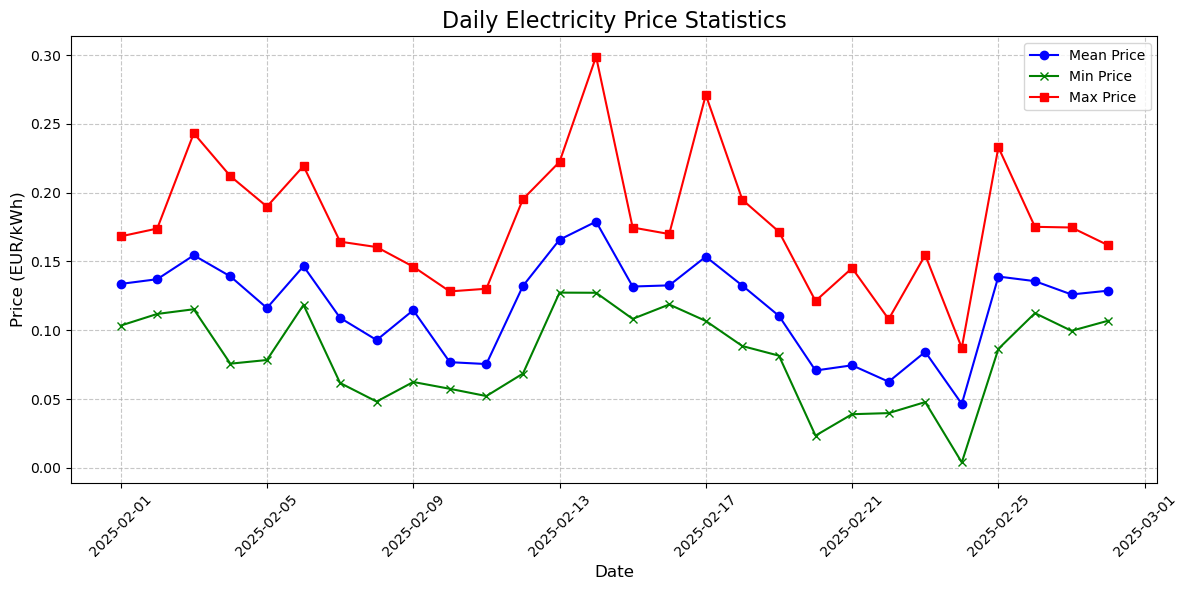

In [21]:
csv_file = "electricity_prices_2025_02_DK2.csv"
calculate_daily_stats(csv_file)

Daily Statistics:
                mean      min      max
date                                  
2024-12-01  0.085692  0.04536  0.11745
2024-12-02  0.091287  0.02230  0.14790
2024-12-03  0.139096  0.08680  0.21001
2024-12-04  0.170623  0.07334  0.28787
2024-12-05  0.079878  0.03010  0.13965
2024-12-06  0.085482  0.00262  0.15107
2024-12-07  0.060946  0.03741  0.08666
2024-12-08  0.062758  0.03540  0.10392
2024-12-09  0.073140  0.00962  0.11894
2024-12-10  0.145735  0.06711  0.20239
2024-12-11  0.266558  0.10617  0.44510
2024-12-12  0.395356  0.10736  0.93631
2024-12-13  0.178479  0.11495  0.28421
2024-12-14  0.054291  0.00330  0.11693
2024-12-15  0.027084  0.00229  0.04229
2024-12-16  0.020432  0.00002  0.03609
2024-12-17  0.064740  0.01656  0.12736
2024-12-18  0.038657  0.02144  0.05757
2024-12-19  0.033635  0.00041  0.07118
2024-12-20  0.035705  0.01279  0.08788
2024-12-21  0.021059  0.00400  0.03143
2024-12-22  0.023806  0.00066  0.06547
2024-12-23  0.059103  0.00925  0.10829
2024-12

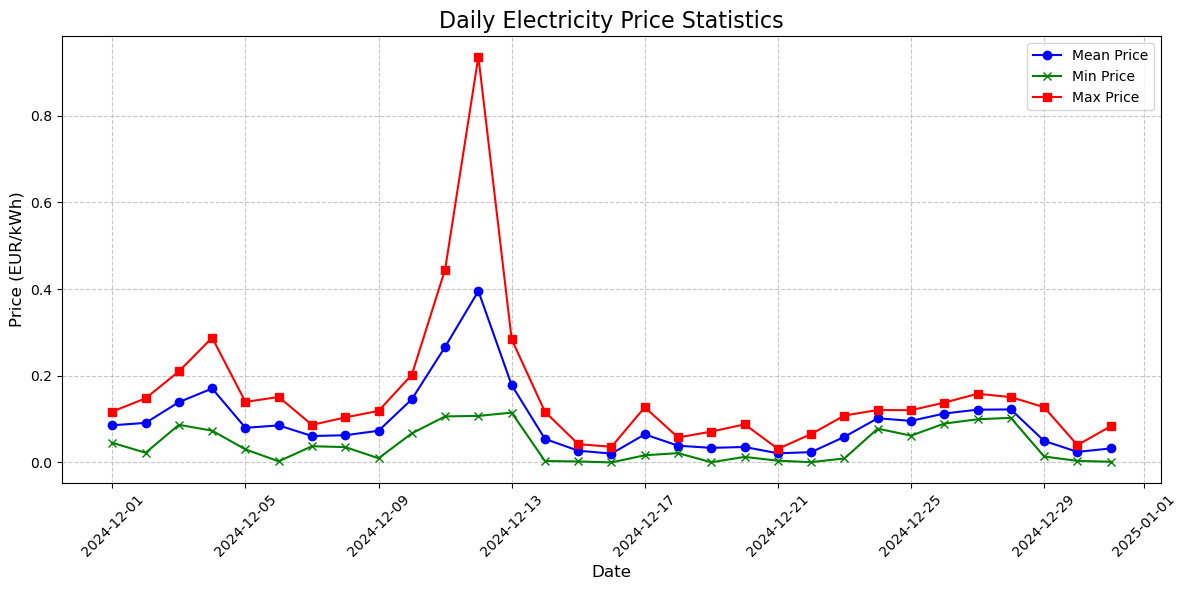

In [22]:
csv_file = "electricity_prices_2024_12_DK2.csv"
calculate_daily_stats(csv_file)

In [23]:
def identify_peak_hours(csv_file):
    """
    این تابع ساعات اوج مصرف (ساعاتی که قیمت برق بیشترین مقدار را دارد) را شناسایی و نمایش می‌دهد.
    
    پارامترها:
    csv_file (str): مسیر فایل CSV حاوی داده‌های قیمت برق.
    """
    
    df = pd.read_csv(csv_file)

    df['date'] = pd.to_datetime(df['date'])

    df['datetime'] = df['date'].astype(str) + ' ' + df['time_start'].str.split('T').str[1]
    df['datetime'] = pd.to_datetime(df['datetime'])
 
    peak_hours = df[df['EUR_per_kWh'] == df['EUR_per_kWh'].max()]

    print("Peak Hours (Maximum Price):")
    print(peak_hours[['datetime', 'EUR_per_kWh']])

    plt.figure(figsize=(12, 6))

    plt.plot(df['datetime'], df['EUR_per_kWh'], label='Electricity Price', color='blue')

    plt.scatter(peak_hours['datetime'], peak_hours['EUR_per_kWh'], color='red', label='Peak Hours', zorder=5)

    plt.title('Electricity Prices with Peak Hours Highlighted', fontsize=16)
    plt.xlabel('Date and Time', fontsize=12)
    plt.ylabel('Price (EUR/kWh)', fontsize=12)

    plt.xticks(rotation=45)

    plt.grid(True, linestyle='--', alpha=0.7)

    plt.legend()

    plt.tight_layout()
    plt.show()

Peak Hours (Maximum Price):
                     datetime  EUR_per_kWh
329 2025-02-14 17:00:00+01:00      0.29893


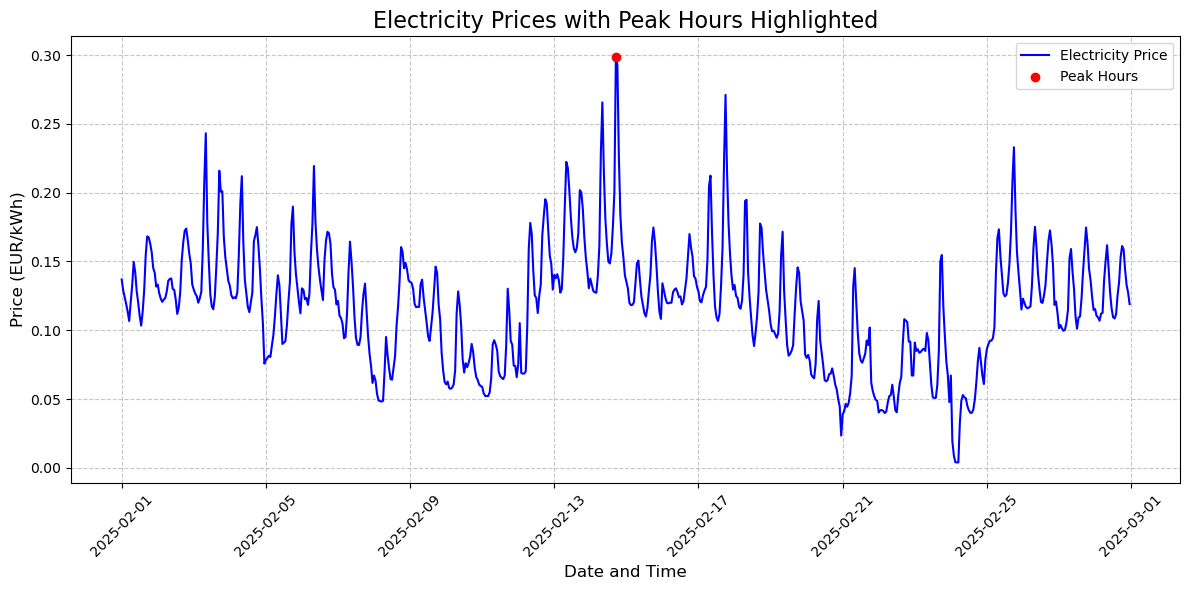

In [24]:
csv_file = "electricity_prices_2025_02_DK2.csv"
identify_peak_hours(csv_file) 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import glob

In [26]:
def combine_csv_files(file_pattern):
    """
    این تابع تمام فایل‌های CSV که با الگوی مشخص شده تطابق دارند را می‌خواند و ترکیب می‌کند.
    
    پارامترها:
    file_pattern (str): الگوی نام فایل‌ها (مثلاً 'electricity_prices_*.csv').
    
    بازگشت:
    DataFrame: داده‌های ترکیب‌شده از تمام فایل‌ها.
    """

    all_files = glob.glob(file_pattern)
    
    combined_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    
    return combined_df

In [27]:
def predict_electricity_prices(file_pattern):
    """
    این تابع یک مدل رگرسیون خطی برای پیش‌بینی قیمت برق آموزش می‌دهد و نتایج را نمایش می‌دهد.
    
    پارامترها:
    file_pattern (str): الگوی نام فایل‌ها (مثلاً 'electricity_prices_*.csv').
    """

    df = combine_csv_files(file_pattern)

    df['date'] = pd.to_datetime(df['date'])
 
    df['hour'] = df['time_start'].str.split('T').str[1].str.split(':').str[0].astype(int)

    X = df[['hour']] 
    y = df['EUR_per_kWh'] 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
 
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    plt.figure(figsize=(12, 6))

    plt.scatter(X_test, y_test, color='blue', label='Actual Prices')

    plt.plot(X_test, y_pred, color='red', label='Predicted Prices')

    plt.title('Electricity Price Prediction (Linear Regression)', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Price (EUR/kWh)', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.7)

    plt.legend()

    plt.tight_layout()
    plt.show()

Mean Squared Error: 0.0052107776030142225


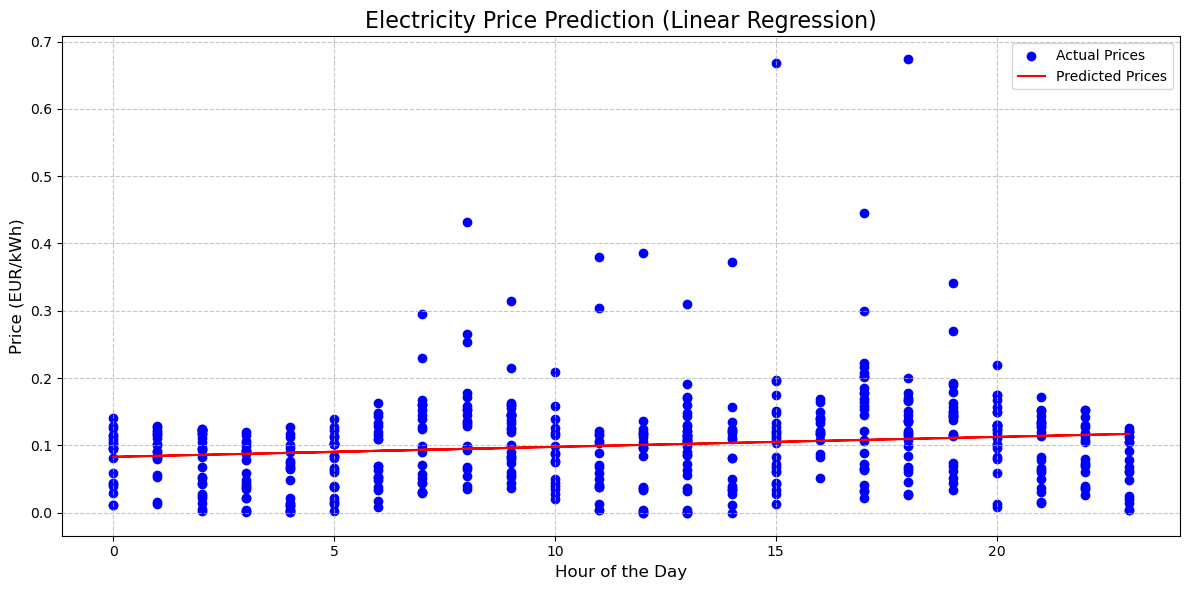

In [28]:
file_pattern = "electricity_prices_*.csv"
predict_electricity_prices(file_pattern)

In [29]:
def train_model(file_pattern):
    """
    این تابع یک مدل رگرسیون خطی برای پیش‌بینی قیمت برق آموزش می‌دهد.
    
    پارامترها:
    file_pattern (str): الگوی نام فایل‌ها (مثلاً 'electricity_prices_*.csv').
    
    بازگشت:
    model: مدل آموزش‌دیده.
    """

    df = combine_csv_files(file_pattern)

    df['date'] = pd.to_datetime(df['date'])

    df['hour'] = df['time_start'].str.split('T').str[1].str.split(':').str[0].astype(int)

    X = df[['hour']] 
    y = df['EUR_per_kWh'] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    
    return model

In [30]:
def predict_future_prices(model, start_date):
    """
    این تابع قیمت برق را برای یک روز خاص پیش‌بینی می‌کند.
    
    پارامترها:
    model: مدل آموزش‌دیده.
    start_date (str): تاریخ روز مورد نظر به فرمت 'YYYY-MM-DD'.
    
    بازگشت:
    DataFrame: جدول حاوی ساعت‌های روز و قیمت‌های پیش‌بینی‌شده.
    """

    hours = list(range(24))

    future_data = pd.DataFrame({'hour': hours})

    future_data['predicted_price'] = model.predict(future_data[['hour']])

    future_data['date'] = start_date

    print(f"Predicted Electricity Prices for {start_date}:")
    print(future_data[['date', 'hour', 'predicted_price']])

    plt.figure(figsize=(12, 6))
    plt.plot(future_data['hour'], future_data['predicted_price'], marker='o', color='blue', label='Predicted Prices')
    plt.title(f'Predicted Electricity Prices for {start_date}', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Price (EUR/kWh)', fontsize=12)
    plt.xticks(range(24))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return future_data

In [31]:
def predict_future_prices(model, start_date):
    """
    این تابع قیمت برق را برای یک روز خاص پیش‌بینی می‌کند.
    
    پارامترها:
    model: مدل آموزش‌دیده.
    start_date (str): تاریخ روز مورد نظر به فرمت 'YYYY-MM-DD'.
    
    بازگشت:
    DataFrame: جدول حاوی ساعت‌های روز و قیمت‌های پیش‌بینی‌شده.
    """
    
    hours = list(range(24))

    future_data = pd.DataFrame({'hour': hours})

    future_data['predicted_price'] = model.predict(future_data[['hour']])
    
    future_data['date'] = start_date

    print(f"Predicted Electricity Prices for {start_date}:")
    print(future_data[['date', 'hour', 'predicted_price']])

    plt.figure(figsize=(12, 6))
    plt.plot(future_data['hour'], future_data['predicted_price'], marker='o', color='blue', label='Predicted Prices')
    plt.title(f'Predicted Electricity Prices for {start_date}', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Price (EUR/kWh)', fontsize=12)
    plt.xticks(range(24)) 
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return future_data

Mean Squared Error: 0.0052107776030142225
Predicted Electricity Prices for 2025-03-21:
          date  hour  predicted_price
0   2025-03-21     0         0.082844
1   2025-03-21     1         0.084325
2   2025-03-21     2         0.085807
3   2025-03-21     3         0.087289
4   2025-03-21     4         0.088770
5   2025-03-21     5         0.090252
6   2025-03-21     6         0.091734
7   2025-03-21     7         0.093216
8   2025-03-21     8         0.094697
9   2025-03-21     9         0.096179
10  2025-03-21    10         0.097661
11  2025-03-21    11         0.099142
12  2025-03-21    12         0.100624
13  2025-03-21    13         0.102106
14  2025-03-21    14         0.103587
15  2025-03-21    15         0.105069
16  2025-03-21    16         0.106551
17  2025-03-21    17         0.108032
18  2025-03-21    18         0.109514
19  2025-03-21    19         0.110996
20  2025-03-21    20         0.112477
21  2025-03-21    21         0.113959
22  2025-03-21    22         0.115441
2

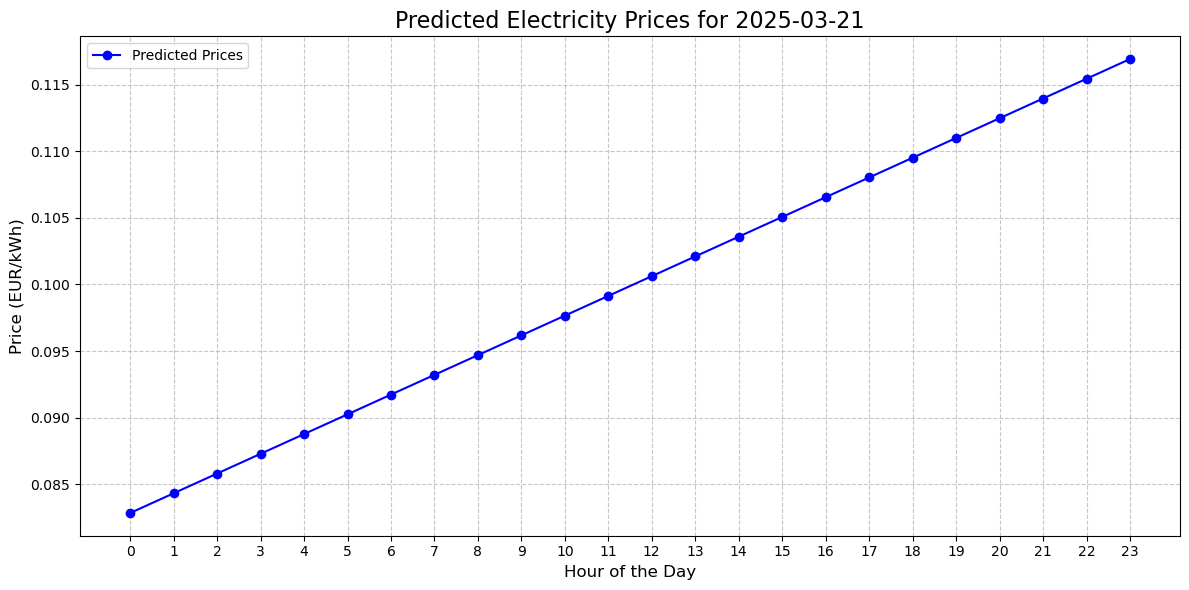

In [32]:
file_pattern = "electricity_prices_*.csv" 
model = train_model(file_pattern) 

start_date = '2025-03-21'
predicted_prices = predict_future_prices(model, start_date)